# Simple image processing on Raspberry Pi with Python / RaspberryPiでPythonを使った簡単な画像処理

## Taking a picture with a camera / カメラで写真を撮る

First, let`s check if camera is working correctly and take an picture / まず、カメラが正しく動作しているかどうかを確認し、写真を撮ってみましょう。

[3:44:20.937832711] [2748]  INFO Camera camera_manager.cpp:325 libcamera v0.3.2+99-1230f78d
[3:44:21.006601088] [2765]  WARN RPiSdn sdn.cpp:40 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[3:44:21.009021815] [2765]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media2 and ISP device /dev/media0
[3:44:21.009088259] [2765]  INFO RPI pipeline_base.cpp:1120 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[3:44:21.018263636] [2748]  INFO Camera camera.cpp:1197 configuring streams: (0) 640x480-XBGR8888 (1) 640x480-SGBRG10_CSI2P
[3:44:21.018668612] [2765]  INFO RPI vc4.cpp:622 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected unicam format: 640x480-pGAA


Image saved to pictures/image.jpg


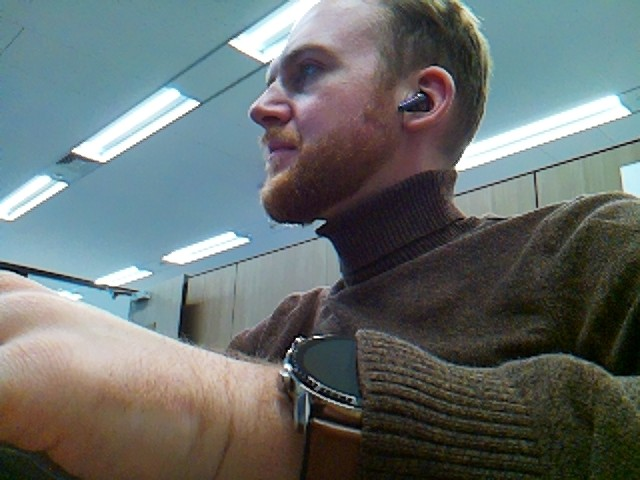

In [1]:
import time
from picamera2 import Picamera2, Preview  # Fixed import
from IPython.display import Image, display
import os

def initialize_camera():
    """
    Initialize the PiCamera instance.
    PiCamera インスタンスを初期化します。
    """
    picam2 = Picamera2()
    config = picam2.create_preview_configuration()
    picam2.configure(config)
    return picam2


def capture_image(camera, directory, filename):
    """
    Capture an image and save it to the specified directory with the given filename.
    画像を撮影し、指定されたディレクトリに指定されたファイル名で保存します。

    Parameters:
    camera (PiCamera): The initialized PiCamera object. 初期化された PiCamera オブジェクト。
    directory (str): The directory where the image will be saved. 画像を保存するディレクトリ。
    filename (str): The name of the file to save the image as. 画像を保存するファイル名。
    """
    if not os.path.exists(directory):
        os.makedirs(
            directory
        )  # Create the directory if it doesn't exist. ディレクトリが存在しない場合は作成します。

    filepath = os.path.join(directory, filename)
    camera.start_preview(
        Preview.NULL
    )  # Specify preview type. プレビュータイプを指定します。
    camera.start()  # Start the camera. カメラを起動します。
    time.sleep(
        2
    )  # Allow the camera to adjust to lighting conditions. カメラが照明条件に適応するために2秒待ちます。
    camera.capture_file(filepath)
    print(f"Image saved to {filepath}")  # 画像が保存されたことを通知します。
    display(Image(filename=filepath))


def run_picture_sequence():
    """
    Main function to initialize the camera and capture an image.
    カメラを初期化し、画像を撮影するメイン関数。
    """
    camera = initialize_camera()
    try:
        capture_image(camera, "pictures", "image.jpg")
    finally:
        camera.stop()  # Ensure the camera is properly closed. カメラが適切に閉じられるようにします。
        camera.stop_preview()  # Stop the preview. プレビューを停止します。
        camera.close()


run_picture_sequence()



### Now, when we confirmed correct image capture by camera module, let's start working with Pillow library. / さて、カメラ・モジュールによる正しい画像の取り込みが確認できたところで、Pillow ライブラリーを操作してみよう。

In [2]:
from PIL import Image as PilImage # Import image module from PIL library / PILライブラリから画像モジュールをインポート

Let's try to save image and open saved image / 画像を保存し、保存した画像を開いてみよう。

In [3]:
def initial_image_test():
    initial_image_path = "pictures/image.jpg"
    processed_image_path = "pictures/example.jpg"
    
    tested_image = PilImage.open(initial_image_path)
    
    tested_image.save(processed_image_path)

    return tested_image

processed_image_path = "pictures/example.jpg"
image = initial_image_test()


After saving image it would be useful to display it on the screen to check the output / 画像を保存した後、それをスクリーンに表示して出力をチェックするのが便利だろう。

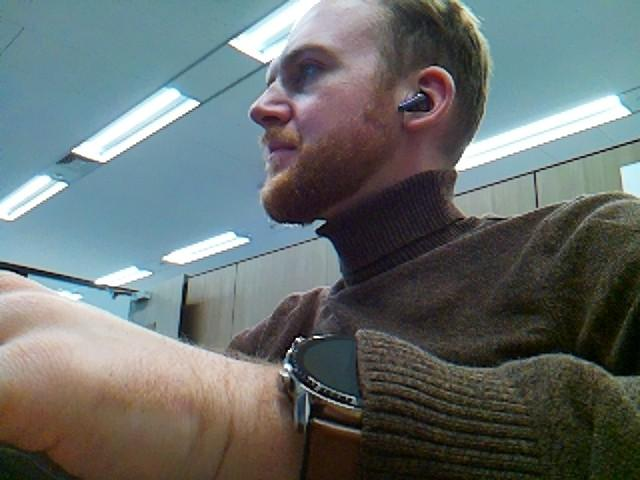

In [4]:
display(Image(filename=processed_image_path))

We will use this process same many times, so let's write a function to save and display output image / この処理は何度も同じように使うので、出力画像を保存して表示する関数を書いてみよう。

In [5]:
def save_and_show_output(image):
    # Convert the image to RGB mode
    rgb_image = image.convert('RGB')
    # Save the image
    rgb_image.save(processed_image_path)
    # Display the image
    display(Image(filename=processed_image_path))

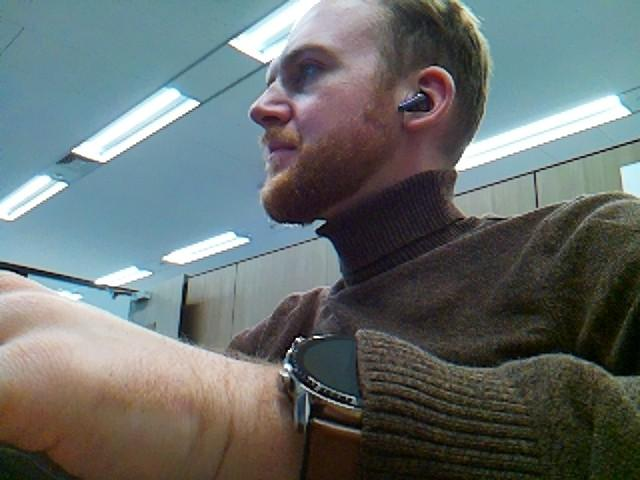

In [6]:
save_and_show_output(image)

Now let's try to change the image size. Ptyhon PIL library has a special function for changing the image size. / では、画像サイズを変更してみましょう。Ptyhon PILライブラリには、画像サイズを変更するための特別な機能があります。

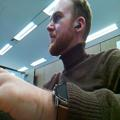

In [7]:
def change_size(image, width, height):
    size = (width, height)  # New size
    resized_image = image.resize(size)
    save_and_show_output(resized_image)

change_size(image, 120,120)

It is also possible to rotate image / 画像を回転させることもできます

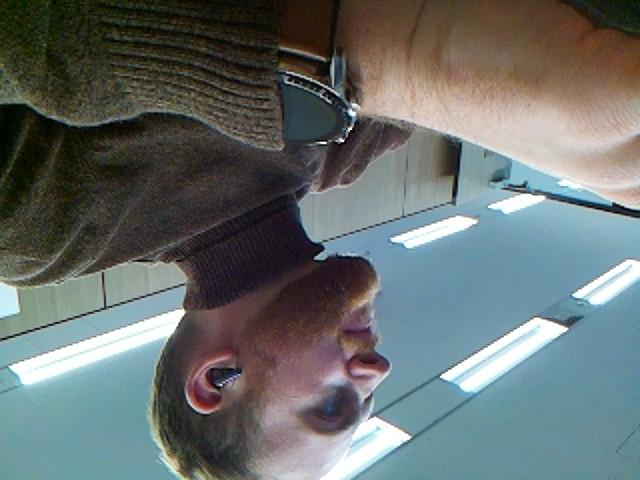

In [8]:
def rotate_image(image, angle):
    rotation_angle = angle # Angle to rotate
    rotated_image = image.rotate(rotation_angle)
    save_and_show_output(rotated_image)

rotate_image(image, 180)

If nescessary, image can also be fliped over x or y axis / 必要であれば、画像をx軸またはy軸で反転させることもできます

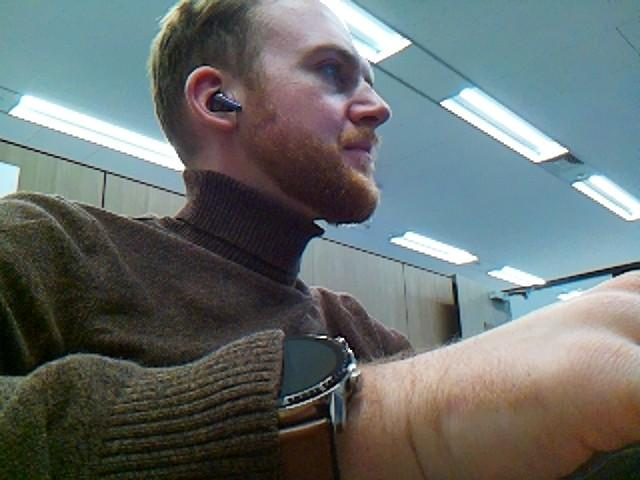

In [9]:
def flip_image_right(image):
    transpose_method = PilImage.Transpose.FLIP_LEFT_RIGHT
    flipped_image = image.transpose(transpose_method)
    save_and_show_output(flipped_image)

flip_image_right(image)

Read more about transpose method in official Pillow website or in GeeksForGeeks tutorial / トランスポーズ・メソッドについては、Pillowの公式サイトまたはGeeksForGeeksのチュートリアルを参照してください。 [Pillow](https://pillow.readthedocs.io/en/stable/reference/Image.html) [GeeksForGeeks](https://www.geeksforgeeks.org/python-pil-image-transpose-method/)

One more fucntion avaliable in PIL is image cropping. To crop the image it is nescessary to setup the crop area by scefying corner coordinates. / PILで利用できるもう一つの機能は画像の切り抜きです。画像を切り抜くには、コーナー座標を指定して切り抜き領域を設定する必要があります。

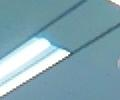

In [10]:
def crop_image(image, left, upper, right, lower):
    crop_area = (left, upper, right, lower)
    cropped_image = image.crop(crop_area)
    save_and_show_output(cropped_image)

crop_image(image, 130, 50, 250, 150)

Reade more about the crop method in official Pillow website or in GeeksForGeeks tutorial / クロップ方法については、ピロー公式サイトまたはGeeksForGeeksのチュートリアルをご参照ください。[Pillow](https://pillow.readthedocs.io/en/stable/reference/Image.html) [GeeksForGeeks](https://www.geeksforgeeks.org/python-crop-image-using-pillow/)

For processing images sometimes it is necessary to change image colors, PIL library includes many libraries that can help user to work with color. For example convert to grayscale. / PILライブラリには、ユーザーが色を扱う際に役立つ多くのライブラリが含まれています。例えば、グレースケールへの変換などです。

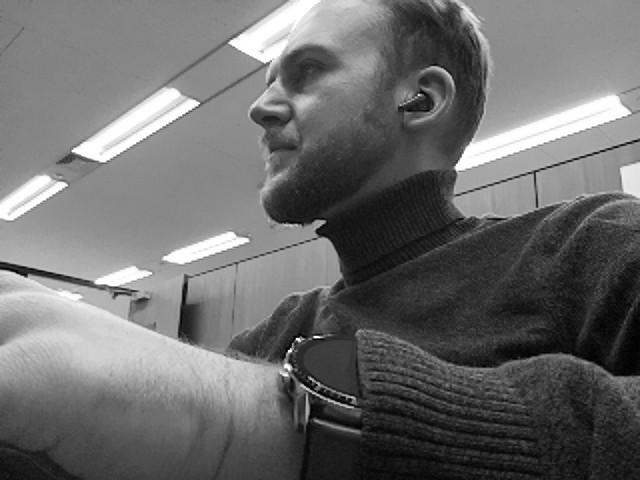

In [11]:
def convert_to_grayscale(image):
    
    # Convert the image to grayscale
    grayscale_image = image.convert("L")
    
    # Save the new image
    save_and_show_output(grayscale_image)

convert_to_grayscale(image)

Modifying the brightness of an image can enhance its visibility or create specific visual effects. / 画像の明るさを変更することで、視認性を高めたり、特定の視覚効果を作り出すことができます。

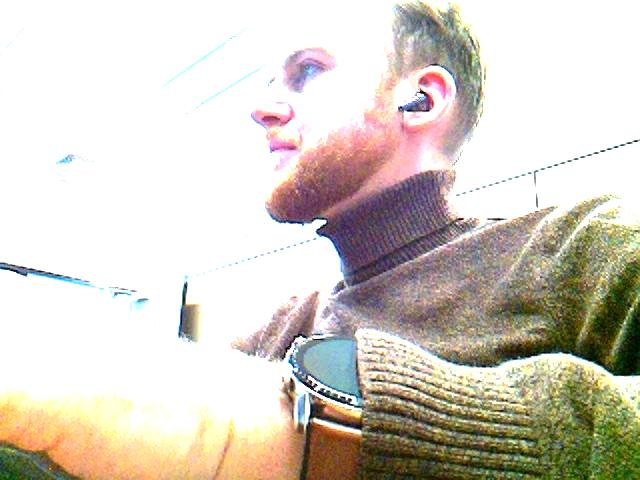

In [12]:
from PIL import ImageEnhance  # Import enhance module from PIL library

def adjust_brightness(image, factor):
    
    # Create an enhancer object for brightness
    enhancer = ImageEnhance.Brightness(image)
    
    # Adjust the brightness; factor > 1 increases brightness, factor < 1 decreases it
    brightened_image = enhancer.enhance(factor)
    
    # Save the new image
    save_and_show_output(brightened_image)

adjust_brightness(image, 3)

Applying a color filter can tint an image with a specific color, creating a unifying hue across the image. / カラーフィルターを適用すると、画像を特定の色で染めることができ、画像全体に統一感のある色合いを作り出すことができます。画像の明るさを変更すると、画像の視認性を高めたり、特定の視覚効果を作り出すことができます。

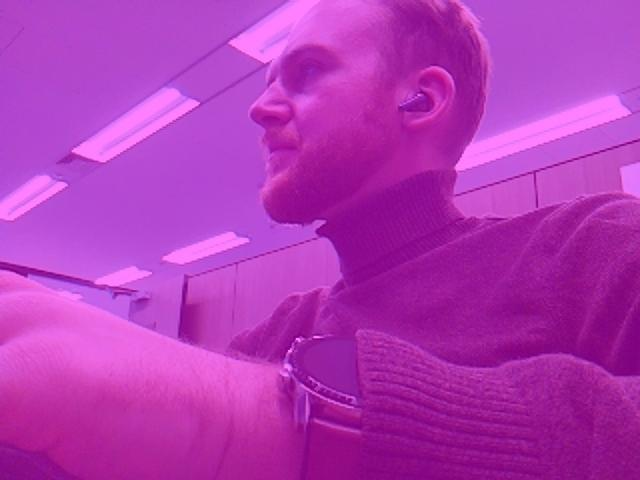

In [13]:
def apply_color_filter(image, color, alpha=0.5):
    # Ensure the image is in RGBA mode
    if image.mode != 'RGBA':
        image = image.convert('RGBA')
    
    # Create an image filled with the specified color
    color_image = PilImage.new('RGBA', image.size, color)
    
    # Blend the original image with the color image
    filtered_image = PilImage.blend(image, color_image, alpha)
    
    # Save or display the new image
    save_and_show_output(filtered_image)

color=(255, 0, 255, 128) # Purple color. Transparency parameter - 128.
apply_color_filter(image, color)

There are many complex functions in PIL library which you can use for working with different image properties, for example change highlight specific color on image / PILライブラリには多くの複雑な関数があり、例えば画像上のハイライトの色を変えるなど、様々な画像プロパティを扱うことができます。

Import numpy library for working with pixel arrays / ピクセル配列を扱うためのnumpyライブラリのインポート

In [14]:
import numpy as np

Define a range of RGB values that encompass the target color. This approach accounts for slight variations in pixel values.

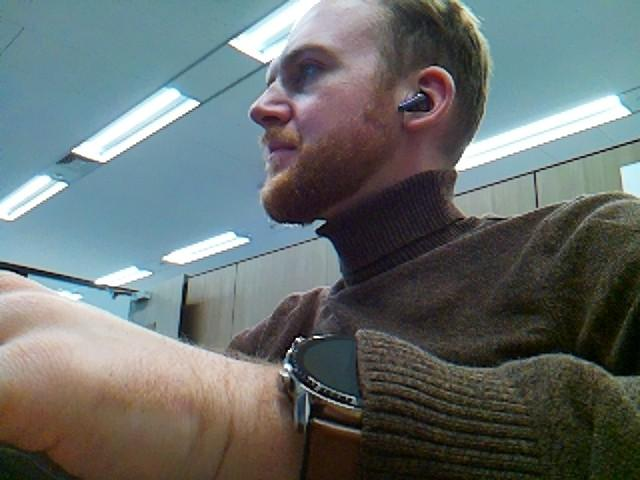

In [15]:
def highlight_yellow_color(image):

    # Convert image to correct color format
    if image.mode == 'RGB':
        image = image.convert('RGBA')
    
    # Convert image to numpy array
    data = np.array(image)
    
    # Separate the color channels
    red, green, blue, alpha = data.T
    
    # Define the color range for yellow
    red_range = (200, 255)
    green_range = (200, 255)
    blue_range = (0, 100)
    
    # Create a mask identifying pixels within the yellow range
    mask = (
        (red >= red_range[0]) & (red <= red_range[1]) &
        (green >= green_range[0]) & (green <= green_range[1]) &
        (blue >= blue_range[0]) & (blue <= blue_range[1])
    )
    
    # Define the new color (e.g., red)
    new_color = (255, 0, 0, 255)
    
    # Apply the new color to the target pixels
    data[..., :][mask.T] = new_color
    
    # Convert the numpy array back to an image
    new_image = PilImage.fromarray(data)
    
    # Save and display image
    save_and_show_output(new_image)


highlight_yellow_color(image)

You can also use PIL library for merging two images. / PILライブラリを使用して、2つの画像を合成することもできます。

For merging we will use an image that was taken by camera and python logo, which you can find in "pictures" folder. / 結合には、「pictures 」フォルダにあるカメラとpythonロゴで撮影した画像を使用します。 `/home/user/image_processing_practice/initial_image_processing/pictures` 

In [17]:
def load_python_logo(path):
    # Load python logo image
    loaded_image = PilImage.open(path)
    return loaded_image

python_logo = load_python_logo("/home/user/image_processing_practice/initial_image_processing/pictures/python_logo.png")
    

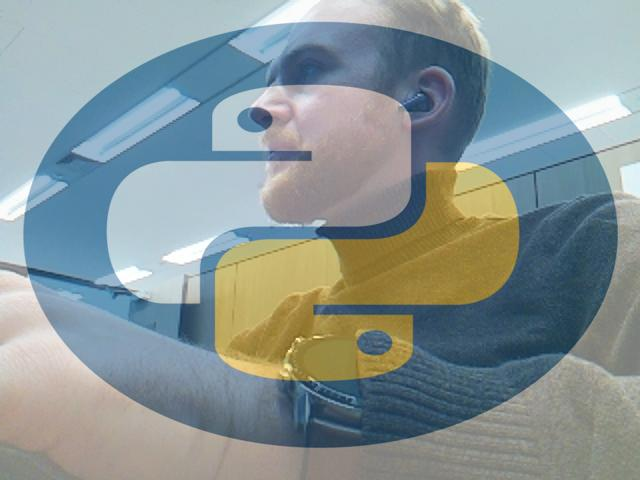

In [18]:
def merge_two_images(image1, image2):
    # Ensure both images are the same size
    if image1.size != image2.size:
        image2 = image2.resize(image1.size)
    
    # Ensure both images have the same mode
    if image1.mode != image2.mode:
        image2 = image2.convert(image1.mode)
    
    # Define the alpha blending factor (0.0 = only image1, 1.0 = only image2)
    alpha = 0.5
    
    # Blend the images
    blended_image = PilImage.blend(image1, image2, alpha)
    
    # Save or display the blended image
    save_and_show_output(blended_image)

merge_two_images(image, python_logo)

    